In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
df = pd.read_csv("Shut in lifts incidents attended by LFB in last 36 months (1).csv", encoding= 'unicode_escape')

# dropping all columns except DateTimeOfCall and BoroughCode
df = df[['DateTimeOfCall', 'BoroughCode']]

# extracting date from DateTimeOfCall
import re

incident_date = []
date_pattern = r'(\d{2}/\d{2}/\d{4}) (\d{2}):(\d{2})'

for t in df['DateTimeOfCall']:
    match = re.match(date_pattern, t)
    if(match):
        incident_date.append(match.group(1))
        
df['date'] = incident_date

# extracting borough short code from BoroughCode
df['bsc'] = [item[-2:] for item in df['BoroughCode']]
df.drop(['DateTimeOfCall', 'BoroughCode'], axis = 1, inplace = True)
df.head()

,date,bsc
0,01/10/2018,15
1,01/10/2018,33
2,01/10/2018,11
3,01/10/2018,32
4,01/10/2018,07


In [31]:
X1_idx = 0; X2_idx = 1; y_idx = 2

data_dict = {}

for i in df['bsc']:
    for j in df['date']:
        key = i + ',' + j
        data_dict[key] = [i, j, 0]

for idx in range(len(df['bsc'])):
    key = df.loc[idx, 'bsc'] + ',' + df.loc[idx, 'date']
    
    if key in data_dict.keys():
        data_dict[key][y_idx] += 1
    else:
        print("Error: The key " + key + " does not exist in the dictionary. Count aborted!")
        break

In [49]:
del df
df = pd.DataFrame()
df['bsc'] = np.array([data_dict[idx][X1_idx] for idx in data_dict.keys()])
df['date'] = np.array([data_dict[idx][X2_idx] for idx in data_dict.keys()])
df['count'] = np.array([data_dict[idx][y_idx] for idx in data_dict.keys()])

df['date'] = pd.to_datetime(df['date'])
df['bsc'] = pd.to_numeric(df['bsc'])
df.head()

,bsc,date,count
0,15,2018-01-10,2
1,15,2018-02-10,0
2,15,2018-03-10,1
3,15,2018-04-10,0
4,15,2018-05-10,1


In [50]:
df_b1 = pd.DataFrame()
df_b1 = df.loc[df['bsc'] == 1]
df_b1.head()

,bsc,date,count
5480,1,2018-01-10,1
5481,1,2018-02-10,0
5482,1,2018-03-10,0
5483,1,2018-04-10,0
5484,1,2018-05-10,2


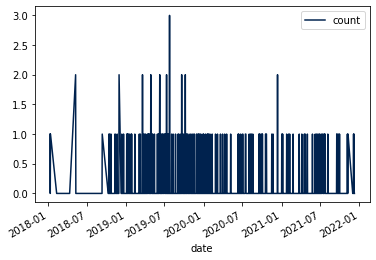

In [51]:
df_b1.plot ( x ='date', y = 'count', kind = 'line', colormap = 'cividis')
plt.show()

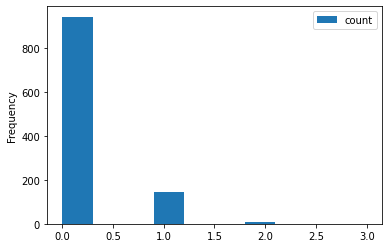

In [52]:
df_b1.plot ( x ='date', y = 'count', kind = 'hist' )
plt.show()

In [53]:
df_b1.drop(['bsc'], axis = 1, inplace = True)
df_b1.columns = ['ds','y']
df_b1.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ds,y
5480,2018-01-10,1
5481,2018-02-10,0
5482,2018-03-10,0
5483,2018-04-10,0
5484,2018-05-10,2


In [84]:
from prophet import Prophet

m = Prophet(interval_width = 0.95, daily_seasonality = True)
model_b1 = m.fit(df_b1)

In [85]:
future_b1 = m.make_future_dataframe(periods=90,freq='D')
forecast_b1 = m.predict(future_b1)
forecast_b1.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-10,0.851698,-0.467914,1.018030,0.851698,0.851698,-0.534595,-0.534595,-0.534595,-0.591359,-0.591359,-0.591359,0.003040,0.003040,0.003040,0.053725,0.053725,0.053725,0.0,0.0,0.0,0.317103
1,2018-01-11,0.851560,-0.346377,1.129821,0.851560,0.851560,-0.502571,-0.502571,-0.502571,-0.591359,-0.591359,-0.591359,0.031124,0.031124,0.031124,0.057664,0.057664,0.057664,0.0,0.0,0.0,0.348989
2,2018-01-12,0.851422,-0.443540,1.114220,0.851422,0.851422,-0.521477,-0.521477,-0.521477,-0.591359,-0.591359,-0.591359,0.009564,0.009564,0.009564,0.060318,0.060318,0.060318,0.0,0.0,0.0,0.329945
3,2018-02-10,0.847428,-0.564484,0.910517,0.847428,0.847428,-0.678491,-0.678491,-0.678491,-0.591359,-0.591359,-0.591359,-0.001051,-0.001051,-0.001051,-0.086081,-0.086081,-0.086081,0.0,0.0,0.0,0.168937
4,2018-02-11,0.847290,-0.578257,0.895890,0.847290,0.847290,-0.653168,-0.653168,-0.653168,-0.591359,-0.591359,-0.591359,0.024792,0.024792,0.024792,-0.086601,-0.086601,-0.086601,0.0,0.0,0.0,0.194122


In [86]:
forecast_b1.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1181,2022-03-05,0.660162,-0.787141,0.721325,0.659955,0.660392,-0.689695,-0.689695,-0.689695,-0.591359,-0.591359,-0.591359,-0.001051,-0.001051,-0.001051,-0.097285,-0.097285,-0.097285,0.0,0.0,0.0,-0.029533
1182,2022-03-06,0.660052,-0.748165,0.804679,0.659842,0.660285,-0.661293,-0.661293,-0.661293,-0.591359,-0.591359,-0.591359,0.024792,0.024792,0.024792,-0.094726,-0.094726,-0.094726,0.0,0.0,0.0,-0.001241
1183,2022-03-07,0.659942,-0.792682,0.641497,0.659727,0.660180,-0.724630,-0.724630,-0.724630,-0.591359,-0.591359,-0.591359,-0.041661,-0.041661,-0.041661,-0.091610,-0.091610,-0.091610,0.0,0.0,0.0,-0.064688
1184,2022-03-08,0.659832,-0.794123,0.705303,0.659613,0.660074,-0.705136,-0.705136,-0.705136,-0.591359,-0.591359,-0.591359,-0.025809,-0.025809,-0.025809,-0.087968,-0.087968,-0.087968,0.0,0.0,0.0,-0.045304
1185,2022-03-09,0.659722,-0.732204,0.736669,0.659499,0.659967,-0.672167,-0.672167,-0.672167,-0.591359,-0.591359,-0.591359,0.003040,0.003040,0.003040,-0.083847,-0.083847,-0.083847,0.0,0.0,0.0,-0.012444


In [87]:
forecast_b1[['ds','yhat']]

,ds,yhat
0,2018-01-10,0.317103
1,2018-01-11,0.348989
2,2018-01-12,0.329945
3,2018-02-10,0.168937
4,2018-02-11,0.194122
...,...,...
1181,2022-03-05,-0.029533
1182,2022-03-06,-0.001241
1183,2022-03-07,-0.064688
1184,2022-03-08,-0.045304


(-1.0, 5.0)

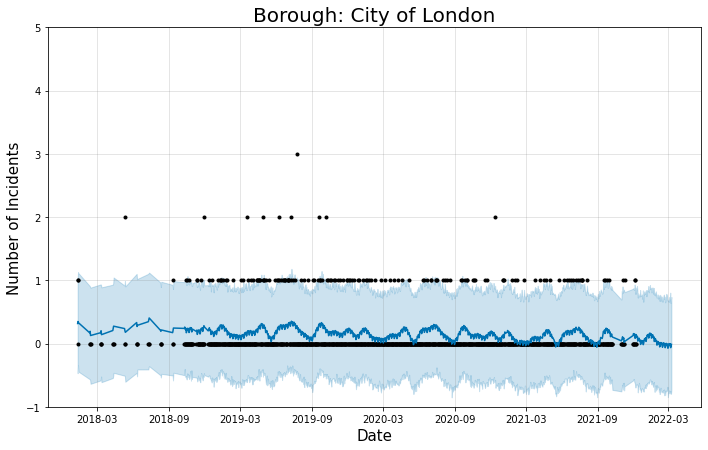

In [99]:
# plot_1_b1 = m.plot(forecast_b1)
plot_1_b1 = m.plot(forecast_b1)
ax = plot_1_b1.gca()
ax.set_title("Borough: City of London", size=20)
ax.set_xlabel("Date", size=15)
ax.set_ylabel("Number of Incidents", size=15)
ax.set_ylim(-1, 5)

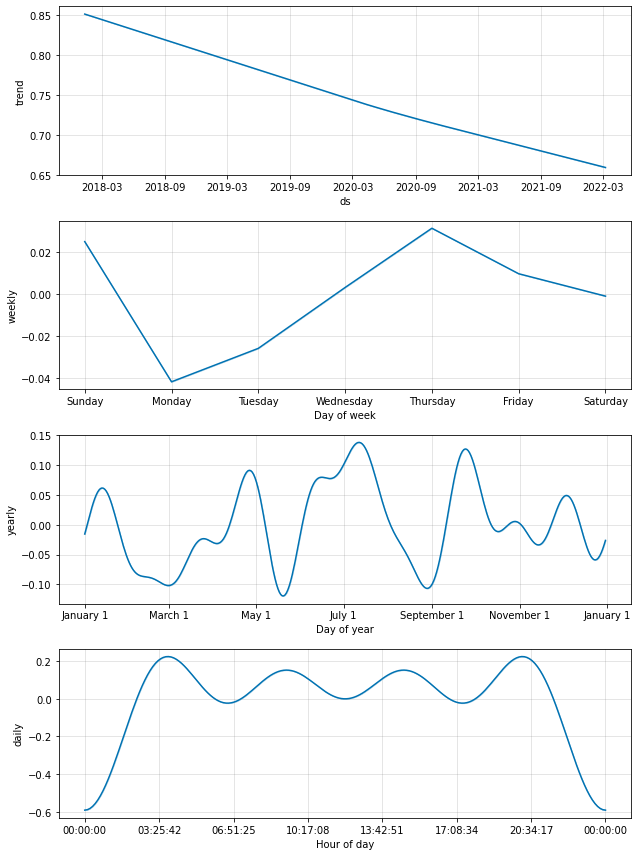

In [89]:
plot_2_b1 = m.plot_components(forecast_b1)

,ds,yhat
0,2018-01-10,0.317103
1,2018-01-11,0.348989
2,2018-01-12,0.329945
3,2018-02-10,0.168937
4,2018-02-11,0.194122
...,...,...
1181,2022-03-05,-0.029533
1182,2022-03-06,-0.001241
1183,2022-03-07,-0.064688
1184,2022-03-08,-0.045304
